In [1]:
import pandas as pd
df = pd.read_csv(r"energy_dataset.csv")
print(df.shape)
df.head()

(35064, 29)


,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2015-01-01 00:00:00+01:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,196.0,0.0,6378.0,17.0,NaN,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 01:00:00+01:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,195.0,0.0,5890.0,16.0,NaN,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 02:00:00+01:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,196.0,0.0,5461.0,8.0,NaN,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 03:00:00+01:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,191.0,0.0,5238.0,2.0,NaN,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 04:00:00+01:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,189.0,0.0,4935.0,9.0,NaN,4861.0,21785.0,20264.0,38.41,56.04


In [2]:
df.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil coal-derived gas', 'generation fossil gas',
       'generation fossil hard coal', 'generation fossil oil',
       'generation fossil oil shale', 'generation fossil peat',
       'generation geothermal', 'generation hydro pumped storage aggregated',
       'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation marine',
       'generation nuclear', 'generation other', 'generation other renewable',
       'generation solar', 'generation waste', 'generation wind offshore',
       'generation wind onshore', 'forecast solar day ahead',
       'forecast wind offshore eday ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual'],
      dtype='object')

In [3]:
df.isna().sum()

time                                               0
generation biomass                                19
generation fossil brown coal/lignite              18
generation fossil coal-derived gas                18
generation fossil gas                             18
generation fossil hard coal                       18
generation fossil oil                             19
generation fossil oil shale                       18
generation fossil peat                            18
generation geothermal                             18
generation hydro pumped storage aggregated     35064
generation hydro pumped storage consumption       19
generation hydro run-of-river and poundage        19
generation hydro water reservoir                  18
generation marine                                 19
generation nuclear                                17
generation other                                  18
generation other renewable                        18
generation solar                              

In [4]:
df1 = df.drop(['generation hydro pumped storage aggregated','forecast wind offshore eday ahead'],axis=1)

In [5]:
df1.shape

(35064, 27)

In [6]:
df1.isna().sum()
df2 = df1.dropna()
print(df2.shape)

(35017, 27)


In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35017 entries, 0 to 35063
Data columns (total 27 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   time                                         35017 non-null  object 
 1   generation biomass                           35017 non-null  float64
 2   generation fossil brown coal/lignite         35017 non-null  float64
 3   generation fossil coal-derived gas           35017 non-null  float64
 4   generation fossil gas                        35017 non-null  float64
 5   generation fossil hard coal                  35017 non-null  float64
 6   generation fossil oil                        35017 non-null  float64
 7   generation fossil oil shale                  35017 non-null  float64
 8   generation fossil peat                       35017 non-null  float64
 9   generation geothermal                        35017 non-null  float64
 10

In [8]:
df2["time"] = pd.to_datetime(df2["time"],utc = True)
print(df2["time"].dtype)
df2.head()

datetime64[ns, UTC]
C:\Users\user\.conda\envs\hello\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,generation solar,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,49.0,196.0,0.0,6378.0,17.0,6436.0,26118.0,25385.0,50.10,65.41
1,2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,50.0,195.0,0.0,5890.0,16.0,5856.0,24934.0,24382.0,48.10,64.92
2,2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,50.0,196.0,0.0,5461.0,8.0,5454.0,23515.0,22734.0,47.33,64.48
3,2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,50.0,191.0,0.0,5238.0,2.0,5151.0,22642.0,21286.0,42.27,59.32
4,2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,42.0,189.0,0.0,4935.0,9.0,4861.0,21785.0,20264.0,38.41,56.04


In [9]:
df2["year"] = df2["time"].dt.year
df2["month"] = df2["time"].dt.month
df2["month_name"] = df2["time"].dt.month_name()
df2["weekdays"] = df2["time"].dt.day_name()
df2["week"] = df2["time"].dt.week

C:\Users\user\.conda\envs\hello\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\.conda\envs\hello\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\user\.conda\envs\hello\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [10]:
df2.head()

,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,year,month,month_name,weekdays,week
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,6436.0,26118.0,25385.0,50.10,65.41,2014,12,December,Wednesday,1
1,2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,5856.0,24934.0,24382.0,48.10,64.92,2015,1,January,Thursday,1
2,2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,5454.0,23515.0,22734.0,47.33,64.48,2015,1,January,Thursday,1
3,2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,5151.0,22642.0,21286.0,42.27,59.32,2015,1,January,Thursday,1
4,2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,4861.0,21785.0,20264.0,38.41,56.04,2015,1,January,Thursday,1


In [11]:
df2.week.unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53], dtype=int64)

In [12]:
df2.weekdays.unique()

array(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday'], dtype=object)

In [13]:
def change(x):
    list1 = ['Sunday', 'Monday','Tuesday','Wednesday', 'Thursday', 'Friday', 'Saturday']
    if x in list1:
        return list1.index(x)
    return x

In [14]:
df2["weekdays"] = list(map(change,df2["weekdays"]))
df2.head()

C:\Users\user\.conda\envs\hello\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,time,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,...,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,year,month,month_name,weekdays,week
0,2014-12-31 23:00:00+00:00,447.0,329.0,0.0,4844.0,4821.0,162.0,0.0,0.0,0.0,...,6436.0,26118.0,25385.0,50.10,65.41,2014,12,December,3,1
1,2015-01-01 00:00:00+00:00,449.0,328.0,0.0,5196.0,4755.0,158.0,0.0,0.0,0.0,...,5856.0,24934.0,24382.0,48.10,64.92,2015,1,January,4,1
2,2015-01-01 01:00:00+00:00,448.0,323.0,0.0,4857.0,4581.0,157.0,0.0,0.0,0.0,...,5454.0,23515.0,22734.0,47.33,64.48,2015,1,January,4,1
3,2015-01-01 02:00:00+00:00,438.0,254.0,0.0,4314.0,4131.0,160.0,0.0,0.0,0.0,...,5151.0,22642.0,21286.0,42.27,59.32,2015,1,January,4,1
4,2015-01-01 03:00:00+00:00,428.0,187.0,0.0,4130.0,3840.0,156.0,0.0,0.0,0.0,...,4861.0,21785.0,20264.0,38.41,56.04,2015,1,January,4,1


In [15]:
df2=df2.drop(['generation fossil coal-derived gas','generation fossil oil shale','generation fossil peat','generation geothermal','generation marine','generation wind offshore'],axis=1)
print(df2.shape)
print(df2.columns)
df2.head()

(35017, 26)
Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'year', 'month', 'month_name', 'weekdays', 'week'],
      dtype='object')


,time,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual,year,month,month_name,weekdays,week
0,2014-12-31 23:00:00+00:00,447.0,329.0,4844.0,4821.0,162.0,863.0,1051.0,1899.0,7096.0,...,6436.0,26118.0,25385.0,50.10,65.41,2014,12,December,3,1
1,2015-01-01 00:00:00+00:00,449.0,328.0,5196.0,4755.0,158.0,920.0,1009.0,1658.0,7096.0,...,5856.0,24934.0,24382.0,48.10,64.92,2015,1,January,4,1
2,2015-01-01 01:00:00+00:00,448.0,323.0,4857.0,4581.0,157.0,1164.0,973.0,1371.0,7099.0,...,5454.0,23515.0,22734.0,47.33,64.48,2015,1,January,4,1
3,2015-01-01 02:00:00+00:00,438.0,254.0,4314.0,4131.0,160.0,1503.0,949.0,779.0,7098.0,...,5151.0,22642.0,21286.0,42.27,59.32,2015,1,January,4,1
4,2015-01-01 03:00:00+00:00,428.0,187.0,4130.0,3840.0,156.0,1826.0,953.0,720.0,7097.0,...,4861.0,21785.0,20264.0,38.41,56.04,2015,1,January,4,1


In [16]:
for i in df2.columns:
    print(i,"-----------------",len(df2[i].unique()))

time ----------------- 35017
generation biomass ----------------- 423
generation fossil brown coal/lignite ----------------- 956
generation fossil gas ----------------- 8293
generation fossil hard coal ----------------- 7265
generation fossil oil ----------------- 321
generation hydro pumped storage consumption ----------------- 3311
generation hydro run-of-river and poundage ----------------- 1684
generation hydro water reservoir ----------------- 7029
generation nuclear ----------------- 2388
generation other ----------------- 103
generation other renewable ----------------- 78
generation solar ----------------- 5331
generation waste ----------------- 262
generation wind onshore ----------------- 11462
forecast solar day ahead ----------------- 5356
forecast wind onshore day ahead ----------------- 11329
total load forecast ----------------- 14786
total load actual ----------------- 15123
price day ahead ----------------- 5747
price actual ----------------- 6641
year ----------------

In [17]:
df2.columns

Index(['time', 'generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'total load forecast', 'total load actual', 'price day ahead',
       'price actual', 'year', 'month', 'month_name', 'weekdays', 'week'],
      dtype='object')

In [18]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

In [28]:
x_train,x_test,y_train,y_test = train_test_split(df2.drop(["time","total load actual","total load forecast","month_name"],axis=1),df2["total load actual"],test_size=0.2,random_state=1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(28013, 22)
(7004, 22)
(28013,)
(7004,)


In [29]:
x_train.columns
,"price day ahead"

Index(['generation biomass', 'generation fossil brown coal/lignite',
       'generation fossil gas', 'generation fossil hard coal',
       'generation fossil oil', 'generation hydro pumped storage consumption',
       'generation hydro run-of-river and poundage',
       'generation hydro water reservoir', 'generation nuclear',
       'generation other', 'generation other renewable', 'generation solar',
       'generation waste', 'generation wind onshore',
       'forecast solar day ahead', 'forecast wind onshore day ahead',
       'price day ahead', 'price actual', 'year', 'month', 'weekdays', 'week'],
      dtype='object')

In [30]:
l = LinearRegression()
l.fit(x_train,y_train)

LinearRegression()

In [31]:
y_pred = l.predict(x_test)

In [32]:
print(metrics.r2_score(y_test,y_pred))

0.907503849329032


In [23]:
import matplotlib.pyplot as plt
import numpy as np

In [24]:
y_test = np.array(y_test)

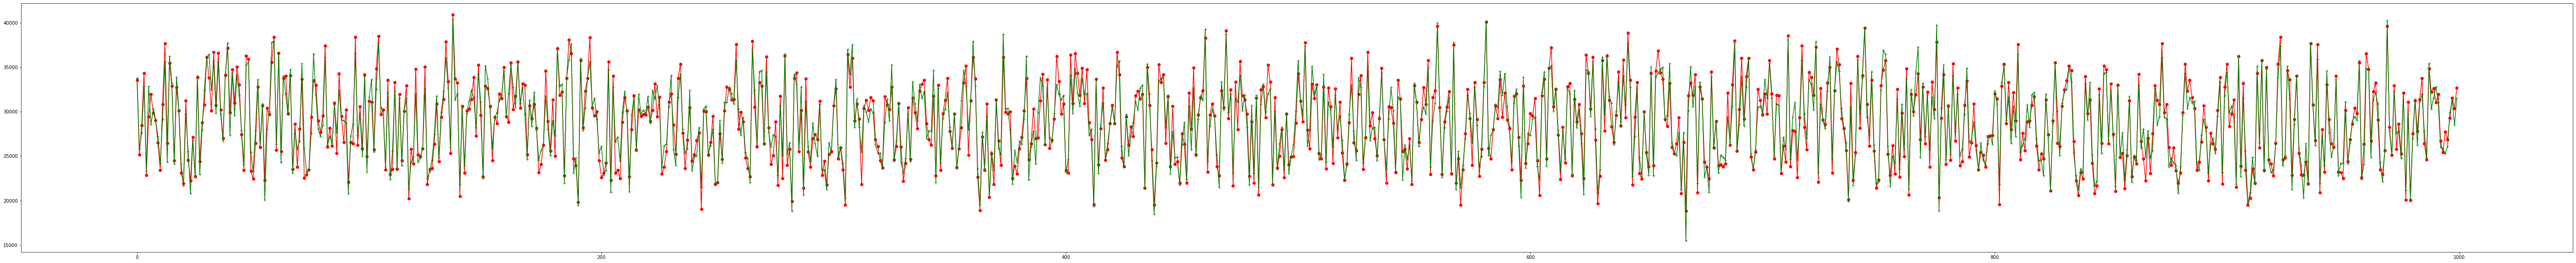

In [25]:
n=1000
plt.figure(figsize=(100,10))
plt.plot(range(0,len(y_test[:n])),y_test[:n],color='red',marker='o')
plt.plot(range(0,len(y_pred[:n])),y_pred[:n],color='green',marker='+')
plt.show()

In [26]:
print(metrics.mean_squared_error(y_test,y_pred)*100)

194565585.21350318
